In [1]:
### LOAD THE NECESSARY LIBRARIES

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
# Use only 2 features for 2D visualization (e.g., first two features)
X = X[:, :2]

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
### Train SVM (Linear and RBF Kernels)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
# Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [10]:
# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

In [11]:
# Evaluate
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

Linear SVM Accuracy: 0.9035087719298246
RBF SVM Accuracy: 0.9210526315789473


In [12]:
### Visualize Decision Boundary (2D)

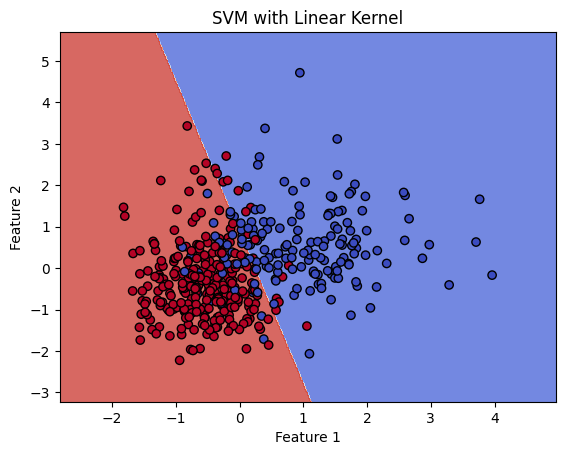

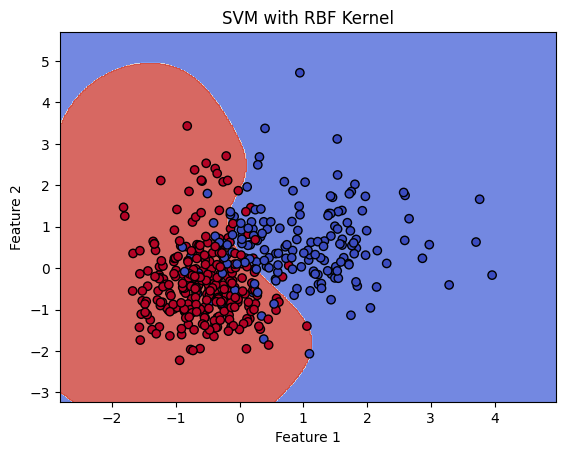

In [13]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")


In [14]:
### Hyperparameter Tuning (C and gamma)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9010989010989011


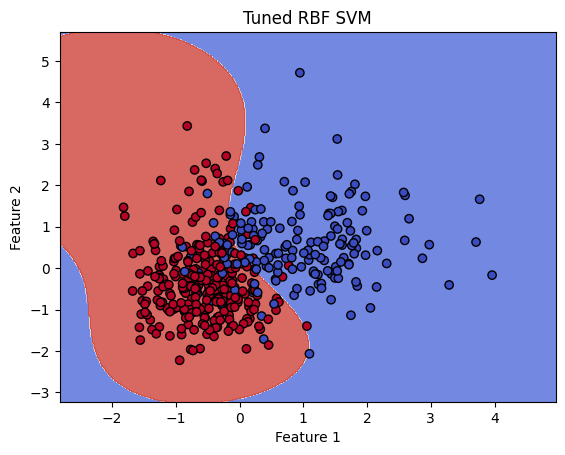

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.5, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Visualize tuned model
plot_decision_boundary(grid.best_estimator_, X_train, y_train, "Tuned RBF SVM")


In [16]:
### Cross-Validation Performance

In [17]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation
scores = cross_val_score(SVC(kernel='rbf', C=1, gamma=0.5), X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validation scores: [0.85087719 0.85087719 0.92105263 0.92982456 0.84955752]
Mean Accuracy: 0.8804378202142523
